# Programming assignment 1: Decision Trees

## Problem 1:  
Build a decision tree T for your data {X,y}.
and use the Gini index to build your tree. Build the tree only to a depth of two! Provide at least the value of the final Gini index at each node and the distribution of classes at each leaf.

### Plot Data

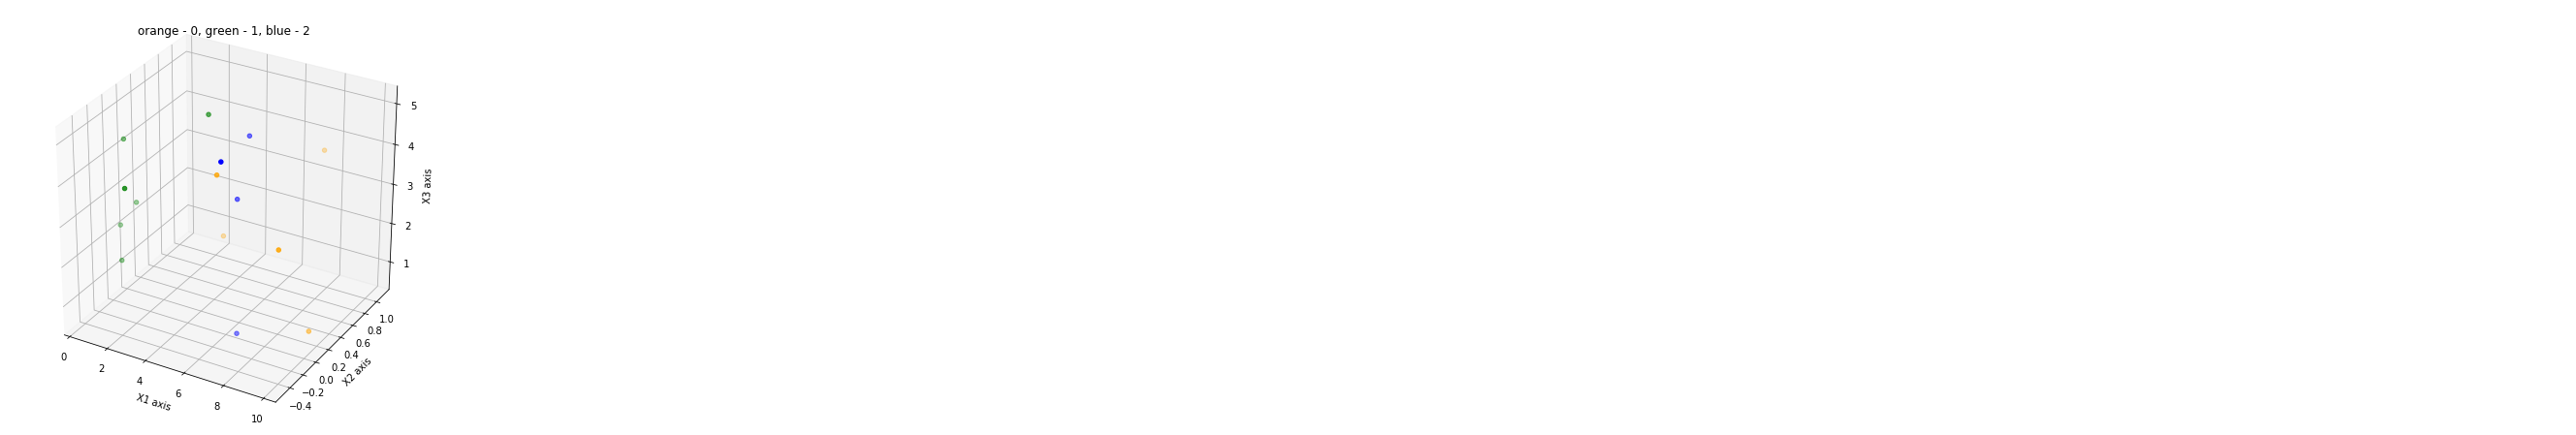

In [78]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file = '01_homework_dataset.csv'
dataset = pd.read_csv(file, names=[0, 1, 2, 3], skiprows=1)
features_all = dataset.loc[:, 0:2]
targets_all = dataset[3]

# Prepare Plot data 3D and plot it
dataset_array = np.array(dataset.values)  # strip header
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

x1 = dataset_array[:, 0]
x2 = dataset_array[:, 1]
x3 = dataset_array[:, 2]
classes = dataset_array[:,3]
colors = ['orange','green','blue']

ax.scatter3D(x1, x2, x3, c=classes, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_title("orange - 0, green - 1, blue - 2")

ax.set_xlabel('X1 axis')
ax.set_ylabel('X2 axis')
ax.set_zlabel('X3 axis')

plt.show()

### Compute Decision Tree with Gini

In [58]:
class DecisionTree(object):

    def __init__(self):
        self.gini = None
        self.column_label = None
        self.split_value = None
        self.left_child = None
        self.right_child = None
        self.distribution_left = [0, 0, 0]
        self.distribution_right = [0, 0, 0]

    def get_gini(targets, num_classes):
        targets_list = list(targets)
        classes_counter = [targets_list.count(label) for label in
                           range(num_classes)]
        sum_p = 0
        for element in range(num_classes):
            sum_p += (classes_counter[element] / len(targets_list)) * (
                        classes_counter[element] / len(targets_list))
        gini = 1 - sum_p
        return gini

    def main_class(targets):
        counts = np.bincount(targets)
        return np.argmax(counts)

    def split(index, value, node_features, node_targets):
        left, right = list(), list()
        dataset_complete = node_features.join(node_targets)
        dataset_array = dataset_complete.values
        for row in dataset_array:
            if row[index] <= value:
                left.append(row)
            else:
                right.append(row)
        left = pd.DataFrame(left, columns=[0, 1, 2, 3])
        right = pd.DataFrame(right, columns=[0, 1, 2, 3])
        return left, right

    def build_tree(self, features, targets, max_depth, current_depth,
                   num_classes=3):
        self.num_classes = num_classes
        self.current_depth = current_depth
        self.max_depth = max_depth
        self.gini = DecisionTree.get_gini(targets.values, num_classes)

        if self.current_depth == self.max_depth or self.gini == 0.0:
            self.column_label = DecisionTree.main_class(targets.values)
            
            print('         [LEAF with Gini: %.3f]' % (self.gini))


            return

        column_labels = features.columns.values
        best_gini = 0
        for column_index in column_labels:
            for row in features.values:
                left_child, right_child = DecisionTree.split(column_index,
                                                             row[column_index],
                                                             features, targets)
                left_child_targets, right_child_targets = left_child.loc[:,
                                                          3], right_child.loc[
                                                              :, 3]

                size_check = left_child.size * right_child.size
                if size_check == 0:
                    continue

                gini_left = DecisionTree.get_gini(left_child_targets.values,
                                                  num_classes)
                gini_right = DecisionTree.get_gini(right_child_targets.values,
                                                   num_classes)

                impurity_gain = self.gini - (
                            len(left_child) / len(targets)) * gini_left - (
                                            len(right_child) / len(
                                        targets)) * gini_right

                if impurity_gain > best_gini:
                    best_gini = impurity_gain
                    self.column_label = column_index
                    self.split_value = row[column_index]
                    for i in range(num_classes):
                        self.distribution_left[i] = list((left_child_targets.values).astype(int)).count(i)
                        self.distribution_right[i] = list((right_child_targets.values).astype(int)).count(i)

        print('[Split label: %d, Split value: %.3f, Gini: %.3f' % (self.column_label, self.split_value, self.gini))
        print('     Classdistribution left -> 0: {0}, 1: {1}, 2: {2}'.format(self.distribution_left[0], self.distribution_left[1], self.distribution_left[2]))
        print('     Classdistribution right -> 0: {0}, 1: {1}, 2: {2}'.format(self.distribution_right[0], self.distribution_right[1], self.distribution_right[2]))
        left_indices = features.loc[
            features[self.column_label] <= self.split_value].index
        right_indices = features.loc[
            features[self.column_label] > self.split_value].index

        # Build Childnodes
        self.left_child = DecisionTree()
        self.left_child.build_tree(features.loc[left_indices],
                                   targets.loc[left_indices],
                                   max_depth, current_depth + 1, num_classes)

        self.right_child = DecisionTree()
        self.right_child.build_tree(features.loc[right_indices],
                                    targets.loc[right_indices],
                                    max_depth, current_depth + 1, num_classes)

        return

#################################################
max_depth = 2
start_depth = 0 
num_classes = 3
tree = DecisionTree()
tree.build_tree(features_all, targets_all, max_depth, start_depth, num_classes)

[Split label: 0, Split value: 4.100, Gini: 0.658
     Classdistribution left -> 0: 0, 1: 6, 2: 0
     Classdistribution right -> 0: 5, 1: 0, 2: 4
         [LEAF with Gini: 0.000]
[Split label: 0, Split value: 6.900, Gini: 0.494
     Classdistribution left -> 0: 2, 1: 0, 2: 4
     Classdistribution right -> 0: 3, 1: 0, 2: 0
         [LEAF with Gini: 0.444]
         [LEAF with Gini: 0.000]


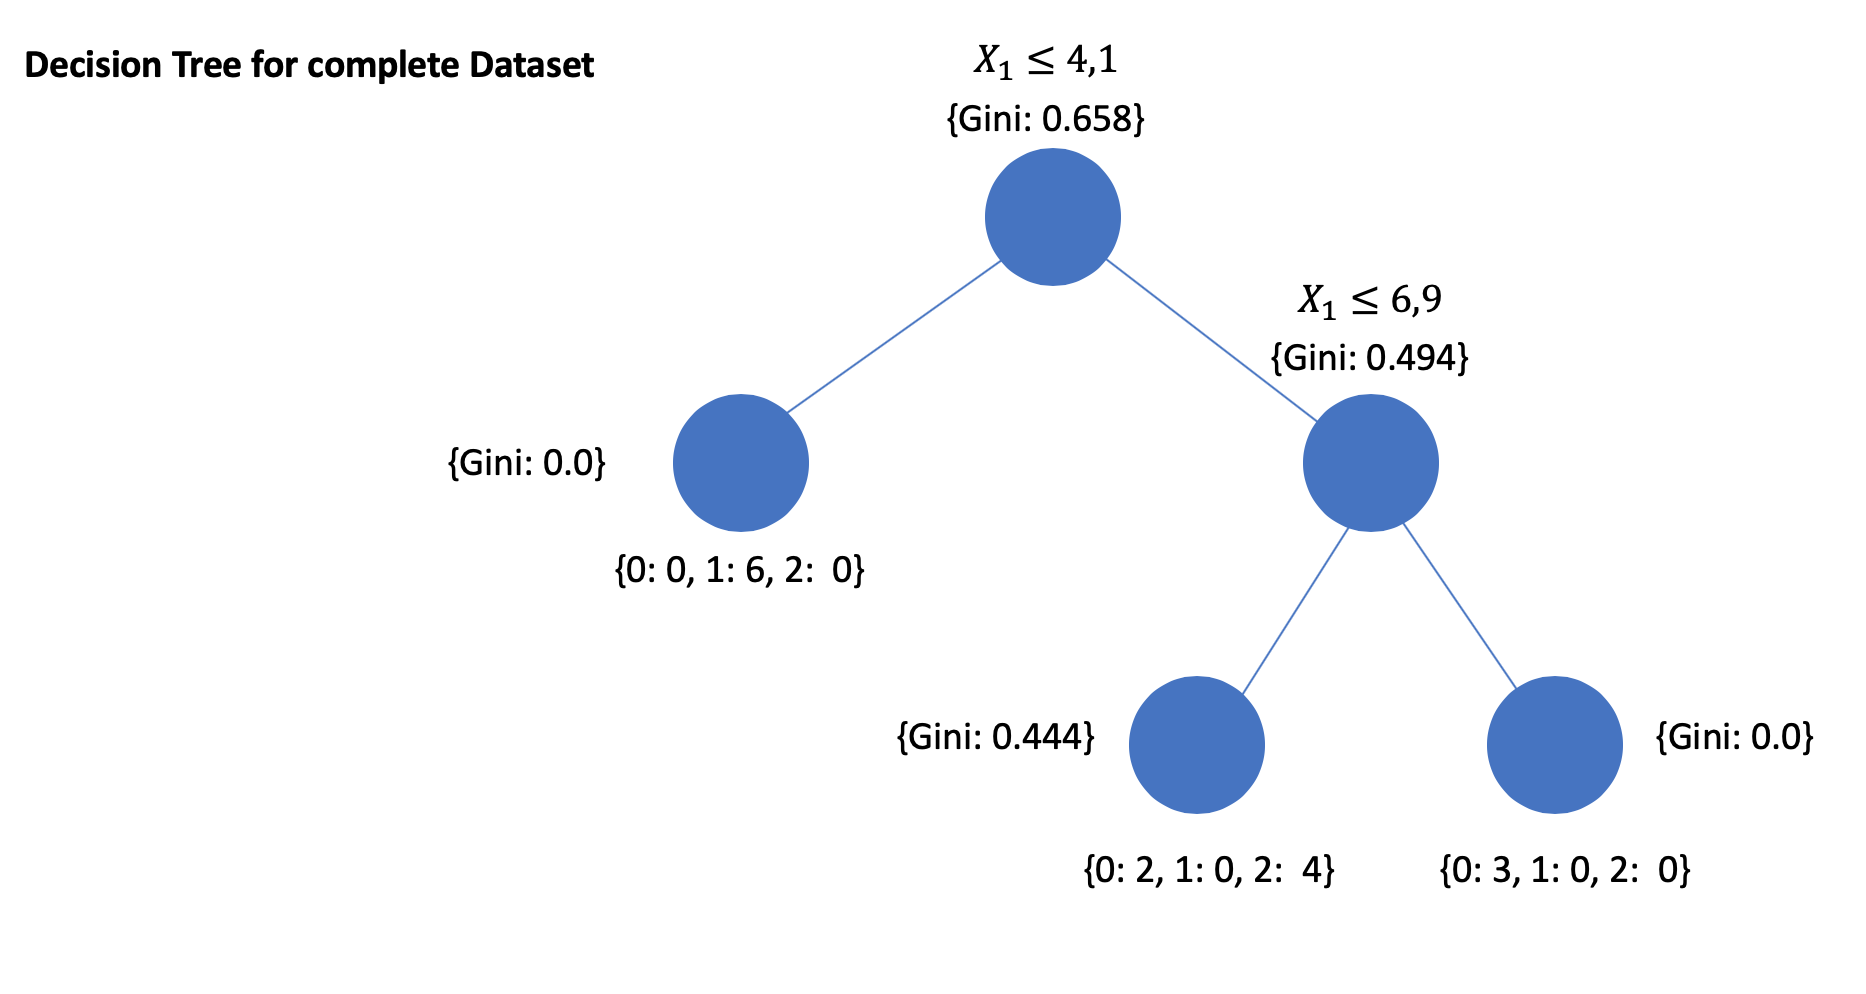

In [59]:
## Tree Image:
from IPython.display import Image

fig = fig = Image(filename=('decisiontree.png'))
fig

## Problem 2:

Use the final tree T from the previous problem to classify the vectors x_a = (4.1, −0.1, 2.2)^T and x_b = (6.1, 0.4, 1.3)^T). Provide both your classification yˆa and yˆb and their respective probabilities. 

With:  
$$p(c=yˆi |x_{i},T)$$  

Yields:
$$y_{a} = 1,\:p_{a} = 1$$
$$y_{b} = 2,\:p_{b} = 2/3$$

# Programming assignment 1: k-Nearest Neighbors classification

In [60]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
%matplotlib inline  

## Introduction
For those of you new to Python, there are lots of tutorials online, just pick whichever you like best :)

If you never worked with Numpy or Jupyter before, you can check out these guides
* https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* http://jupyter.readthedocs.io/en/latest/

## Your task
In this notebook code to perform k-NN classification is provided. However, some functions are incomplete. Your task is to fill in the missing code and run the entire notebook. 

In the beginning of every function there is docstring, which specifies the format of input and output. Write your code in a way that adheres to it.
You may only use plain python and `numpy` functions (i.e. no scikit-learn classifiers).

In [61]:
def load_dataset(split):
    """Load and split the dataset into training and test parts.
    
    Parameters
    ----------
    split : float in range (0, 1)
        Fraction of the data used for training.
    
    Returns
    -------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    y_test : array, shape (N_test)
        Test labels.
    """
    dataset = datasets.load_iris()
    X, y = dataset['data'], dataset['target']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=123, test_size=(1 - split))
    return X_train, X_test, y_train, y_test


## Exporting the results to PDF
Once you complete the assignments, export the entire notebook as PDF and attach it to your homework solutions. 
The best way of doing that is
1. Run all the cells of the notebook.
2. Download the notebook in HTML (click File > Download as > .html)
3. Convert the HTML to PDF using e.g. https://www.sejda.com/html-to-pdf or `wkhtmltopdf` for Linux ([tutorial](https://www.cyberciti.biz/open-source/html-to-pdf-freeware-linux-osx-windows-software/))
4. Concatenate your solutions for other tasks with the output of Step 3. On a Linux machine you can simply use `pdfunite`, there are similar tools for other platforms too. You can only upload a single PDF file to Moodle.

This way is preferred to using `nbconvert`, since `nbconvert` clips lines that exceed page width and makes your code harder to grade.

## Load dataset
The iris data set (https://en.wikipedia.org/wiki/Iris_flower_data_set) is loaded and split into train and test parts by the function `load_dataset`.

In [62]:
# prepare data
split = 0.75
k = 2
X_train, X_test, y_train, y_test = load_dataset(split)

## Plot dataset
Since the data has 4 features, 16 scatterplots (4x4) are plotted showing the dependencies between each pair of features.

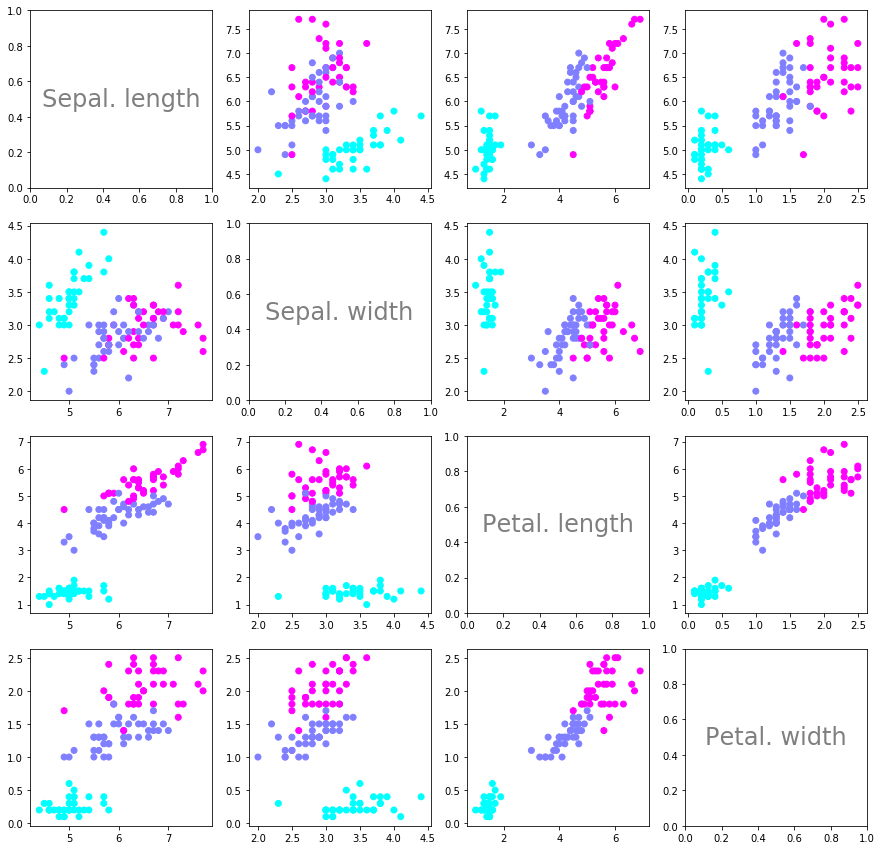

In [63]:
f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(X_train[:,j],X_train[:,i], c=y_train, cmap=plt.cm.cool)

## Task 1: Euclidean distance
Compute Euclidean distance between two data points.

In [64]:
def euclidean_distance(x1, x2):
    """Compute Euclidean distance between two data points.
    
    Parameters
    ----------
    x1 : array, shape (4)
        First data point.
    x2 : array, shape (4)
        Second data point.
    
    Returns
    -------
    distance : float
        Euclidean distance between x1 and x2.
    """
    sum_squares = 0
    for element in range(len(x1)):
        sum_squares += (x1[element]-x2[element])*(x1[element]-x2[element])
        distance = np.sqrt(sum_squares)
    return distance

## Task 2: get k nearest neighbors' labels
Get the labels of the *k* nearest neighbors of the datapoint *x_new*.

In [65]:
def get_neighbors_labels(X_train, y_train, x_new, k):
    """Get the labels of the k nearest neighbors of the datapoint x_new.

    Parameters
    ----------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    x_new : array, shape (4)
        Data point for which the neighbors have to be found.
    k : int
        Number of neighbors to return.

    Returns
    -------
    neighbors_labels : array, shape (k)
        Array containing the labels of the k nearest neighbors.
    """
    # bereche geringste distanzen
    distances = []
    for x in range(len(X_train)):
        dist = euclidean_distance(x_new, X_train[x])
        distances.append((y_train[x], dist))

    distances_sorted = sorted(distances, key=lambda x: x[1])
    neighbors_labels = []
    for x in range(k):
        neighbors_labels.append(distances_sorted[x][0])
    return neighbors_labels

## Task 3: get the majority label
For the previously computed labels of the *k* nearest neighbors, compute the actual response. I.e. give back the class of the majority of nearest neighbors. In case of a tie, choose the "lowest" label (i.e. the order of tie resolutions is 0 > 1 > 2).

In [66]:
def get_response(neighbors_labels, num_classes=3):
    """Predict label given the set of neighbors.
    
    Parameters
    ----------
    neighbors_labels : array, shape (k)
        Array containing the labels of the k nearest neighbors.
    num_classes : int
        Number of classes in the dataset.
    
    Returns
    -------
    y : int
        Majority class among the neighbors.
    """
    # TODO
    class_votes = np.zeros(num_classes)
    for element in range(num_classes):
        class_votes[element] = neighbors_labels.count(element)     
    y=np.argmax(class_votes)
    return y

## Task 4: compute accuracy
Compute the accuracy of the generated predictions.

In [67]:
def compute_accuracy(y_pred, y_test):
    """Compute accuracy of prediction.
    
    Parameters
    ----------
    y_pred : array, shape (N_test)
        Predicted labels.
    y_test : array, shape (N_test)
        True labels.
    """
    accuracy = np.mean(y_test == y_pred)
    return accuracy

In [68]:
# This function is given, nothing to do here.
def predict(X_train, y_train, X_test, k):
    """Generate predictions for all points in the test set.
    
    Parameters
    ----------
    X_train : array, shape (N_train, 4)
        Training features.        
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    k : int
        Number of neighbors to consider.
    
    Returns
    -------
    y_pred : array, shape (N_test)
        Predictions for the test data.
    """
    y_pred = []
    for x_new in X_test:
        neighbors = get_neighbors_labels(X_train, y_train, x_new, k)
        y_pred.append(get_response(neighbors))
    return y_pred

## Testing
Should output an accuracy of 0.9473684210526315.

In [69]:
# prepare data
split = 0.75
X_train, X_test, y_train, y_test = load_dataset(split)
print('Training set: {0} samples'.format(X_train.shape[0]))
print('Test set: {0} samples'.format(X_test.shape[0]))

# generate predictions
k = 3
y_pred = predict(X_train, y_train, X_test, k)
accuracy = compute_accuracy(y_pred, y_test)
print('Accuracy = {0}'.format(accuracy))

Training set: 112 samples
Test set: 38 samples
Accuracy = 0.9473684210526315


# Problem 4:
Classify the two vectors x_a and x_b given in Problem 2 with the k-nearest neighbors algorithm. Use k = 3 and Euclidean distance. x_a = (4.1, −0.1, 2.2)T and x_b = (6.1, 0.4, 1.3)T 

In [70]:
x_a = [4.1, np.negative(0.1), 2.2]
x_b = [6.1, 0.4, 1.3]
x_new12 = (x_a, x_b)
k = 3

y_pred2 = predict(np.array(features_all.values), np.array(targets_all.values), x_new12, k)

print('Classification result:\n y_a = %d , for y_b = %d' % (y_pred2[0], y_pred2[1]))

Classification result:
 y_a = 0 , for y_b = 2


# Problem 5:
Now, consider y_i to be real-valued targets rather than classes. Perform 3-NN regression to label the vectors from Problem 2.

In [71]:
def knn_regression(features, targets, x_new, k):

    distances = []
    for x in range(len(features)):
        dist = euclidean_distance(x_new, features[x])
        distances.append((targets[x], dist))

    neighbors_sorted = sorted(distances, key=lambda x: x[1])
    #print(distances_sorted)
    neighbors = []
    z = 0
    weighed_neighbors = 0
    for x in range(k):
        z += 1/neighbors_sorted[x][1]
        weighed_neighbors += ((1/neighbors_sorted[x][1]))*neighbors_sorted[x][0]
    return (1./z)*weighed_neighbors

print('y_a = %.3f' % knn_regression(np.array(features_all.values), np.array(targets_all.values), x_a, k))
print('y_b = %.3f' % knn_regression(np.array(features_all.values), np.array(targets_all.values), x_b, k))


y_a = 0.561
y_b = 1.396


# Problem 6:
Look at the data. Which problem do you see w.r.t. building a Euclidean distance-based k-NN model on X? How can you compensate for this problem? Does this problem also arise when training a decision tree?

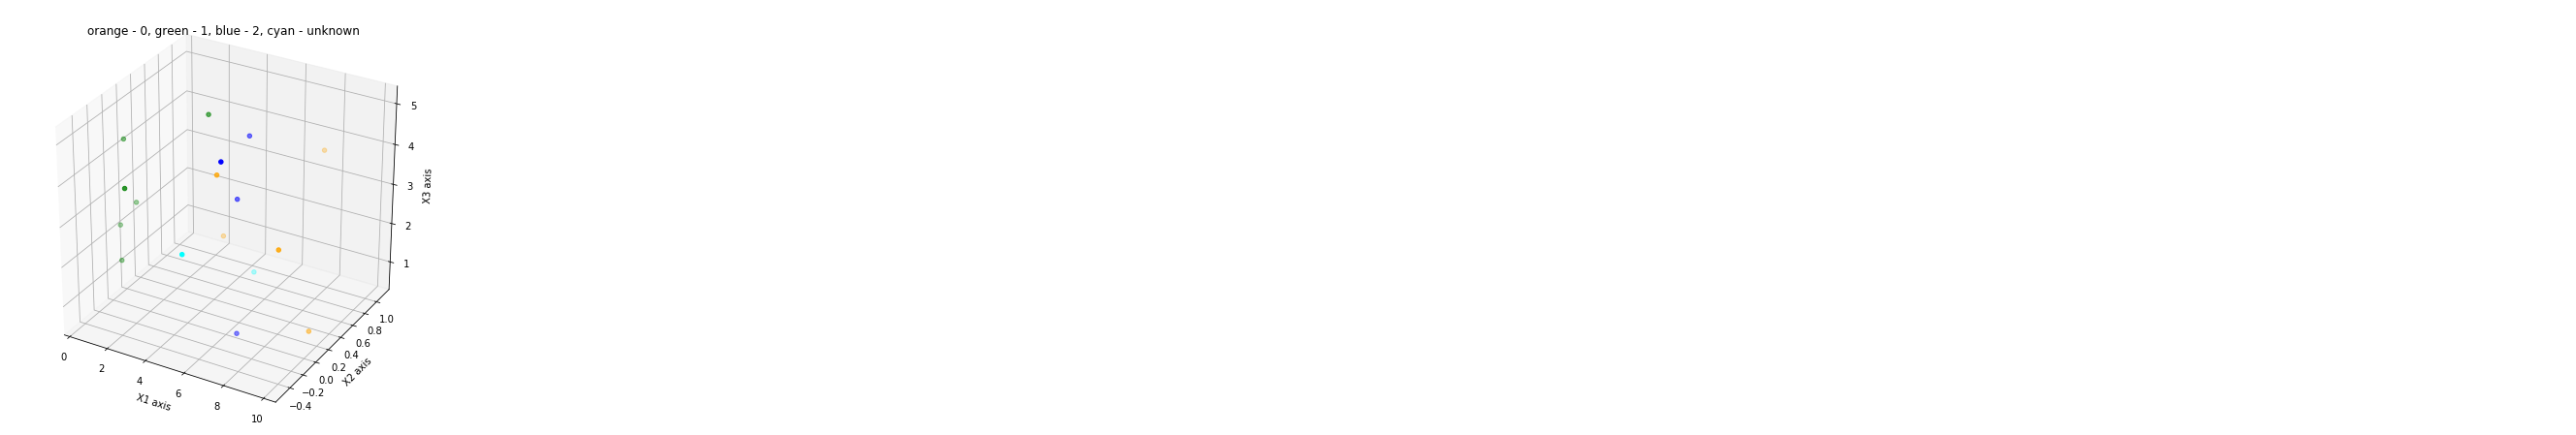

In [72]:
## Plotting Datapoints and Testpoints 

# Prepare datapoints (y: orange=0, green=1, blue=2)3D plot
dataset_array = np.array(dataset.values) 

xnew_array = np.asarray(x_new12)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

x1 = dataset_array[:, 0]
x2 = dataset_array[:, 1]
x3 = dataset_array[:, 2]
classes = dataset_array[:,3]
colors = ['orange','green','blue']

ax.scatter3D(x1, x2, x3, c=classes, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_title("orange - 0, green - 1, blue - 2, cyan - unknown")

# Prepare testpoints (y: cyan=unknown) and plot into datapoints plot
x1 = xnew_array[:, 0]
x2 = xnew_array[:, 1]
x3 = xnew_array[:, 2]
classes = [5, 5]
colors = ['cyan']

ax.scatter3D(x1, x2, x3, c=classes, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('X1 axis')
ax.set_ylabel('X2 axis')
ax.set_zlabel('X3 axis')

plt.show()

Comparing the results of the K-NN algorithms and the decisiontree (DT) it can be seen that the testpoint x_a, which has an x1 value of 4,1 and by that equals the first split value of the DT, is ones classified as 1 (dt) ones as 0 (knn).  

Due to the curse of dimensionality the edge length of the hypercube (HQ) constructed arround the individual testpoints needs to be fairly large. Using the formula  
$$ e_{D}(f)=f^{1/D}$$  
with D = dimensions = 3, f = K/num(datapoints), K = 3, and num(datapoints) = 15, the HQ edgelengths correspond to  

$$e_{3}(0.2)=0.2^{1/3}=0.58.$$  


This means every HQ edge measures 58% of the datas unitcubes length.  
This said, the testpoints "nearest neighbors" are fairly far away, making a reliable prediction of the testpoints class, based on the "nearest" points by euclidean distance, rather difficult.  

This problem can be reduced by using inductive bias i.e. making assumptions about the distribution and nature of the data in question (e.g.: linear regression, logistic regression). [1]

[1] K. P. Murphy. "Machine Learning: A probabilistic Perspective." (2012): 18-19 